In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# US Airline Passenger Satisfaction Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df_train=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df_train

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [4]:
df_test=pd.read_csv('/kaggle/input/airline-passenger-satisfaction/test.csv')
df_test

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


# merging train and test data to one data to export it to power bi for analyze

In [5]:
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.shape

(129880, 25)

In [7]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

# removing missing values

In [8]:
df.dropna(axis=0,inplace=True)

In [9]:
df.isna().sum().sum()

0

# drop unnecessary columns

In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

In [12]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [13]:
df['satisfaction'].value_counts(normalize=True)

neutral or dissatisfied    0.565501
satisfied                  0.434499
Name: satisfaction, dtype: float64

# save the data after preprocessing to analyse in power bi

In [14]:
df.to_csv('airline_satisfication.csv',index=False)

In [15]:
df.drop('id',axis=1,inplace=True)

# converting satisfaction column to numerical for prediction

In [16]:
df.replace({'satisfied':1,'neutral or dissatisfied':0},inplace=True)

In [17]:
df['satisfaction'].value_counts(normalize=True)

0    0.565501
1    0.434499
Name: satisfaction, dtype: float64

# converting categorical columns to numerical

In [18]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
le = LabelEncoder()

# Encode the Gender column
df['Gender'] = le.fit_transform(df['Gender'])

# Encode the Customer Type column
df['Customer Type'] = le.fit_transform(df['Customer Type'])

# Encode the Type of Travel column
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

# Encode the Class column
df['Class'] = le.fit_transform(df['Class'])

# splitting the data to X,y to predict y

In [19]:
X=df.drop('satisfaction',axis=1)
y=df['satisfaction']

# splitting the data to train and test

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [21]:
X_train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
59612,0,1,42,0,1,447,2,3,2,4,...,3,3,4,4,3,1,4,3,0,6.0
120795,1,1,25,0,1,1605,2,2,2,2,...,5,5,3,4,2,4,3,5,23,5.0
80948,0,0,36,0,0,782,4,4,4,4,...,5,4,4,5,4,1,4,4,0,0.0
48037,1,0,42,1,2,1107,3,1,3,1,...,1,1,1,4,2,3,1,1,0,0.0
53463,0,0,35,0,2,158,3,4,4,4,...,3,3,4,2,4,3,4,3,39,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128497,1,0,60,0,0,293,5,5,5,5,...,4,5,5,5,5,4,5,5,9,9.0
104004,0,1,36,0,1,1061,2,2,2,1,...,4,4,1,4,2,4,2,4,13,0.0
861,0,0,24,0,0,1013,3,3,3,3,...,3,3,1,1,2,2,2,3,25,13.0
15832,0,0,52,0,1,458,5,2,5,2,...,3,5,5,5,5,4,5,2,0,0.0


In [22]:
X_train.shape

(103589, 22)

In [23]:
X_test.shape

(25898, 22)

In [24]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report,auc,roc_curve,f1_score,accuracy_score

# using random forest classifier to train and evaluate test data and calculate the accuracy

In [25]:
rfr=RandomForestClassifier(n_estimators=100)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9622364661363811


# Generate confusion matrix to calculate precision,recall and f1_score for random forest


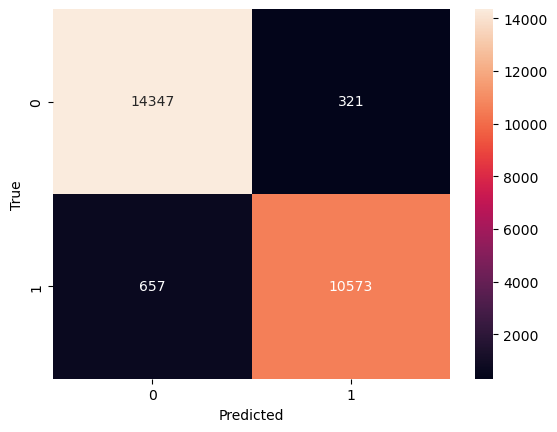

In [26]:
# Generate confusion matrix
cm_rfr = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm_rfr, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# calculate classification_report for random forest

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14668
           1       0.97      0.94      0.96     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



# using gradient boosting classifier to train and evaluate test data and calculate the accuracy

In [28]:
gbc=GradientBoostingClassifier(learning_rate=0.6,n_estimators=500)
gbc.fit(X_train,y_train)
y_pred1 = gbc.predict(X_test)
accuracy=accuracy_score(y_test,y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9610008494864468


# Generate confusion matrix to calculate precision,recall and f1_score for gradient boost


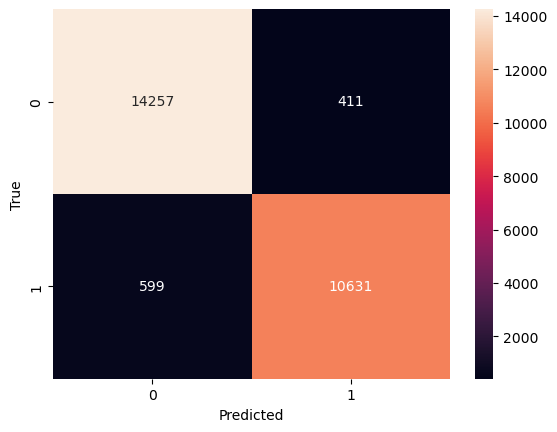

In [29]:
# Generate confusion matrix
cm_gbc = confusion_matrix(y_test, y_pred1)

# Create heatmap
sns.heatmap(cm_gbc, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# calculate classification_report for gradient boost 

In [30]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     14668
           1       0.96      0.95      0.95     11230

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



# using xgbclassifier to train and evaluate test data and calculate the accuracy

In [31]:
from xgboost import XGBClassifier
xgb=XGBClassifier(n_estimators=400,learning_rate=.1)
xgb.fit(X_train,y_train)
y_pred2=xgb.predict(X_test)
accuracy=accuracy_score(y_test,y_pred2)
print("Accuracy:", accuracy)

Accuracy: 0.9644374082940768


# Generate confusion matrix to calculate precision,recall and f1_score for xgboost


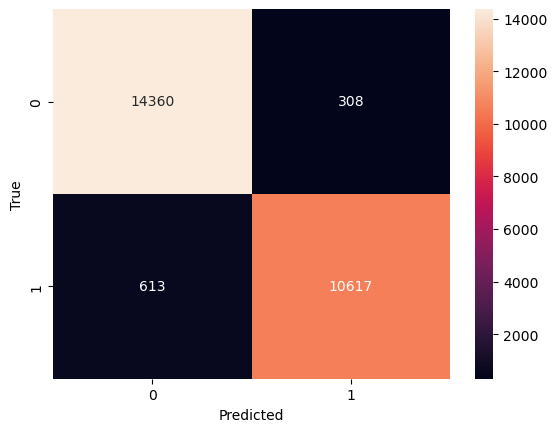

In [32]:
# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred2)

# Create heatmap
sns.heatmap(cm_xgb, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# calculate classification_report for xgboost 

In [33]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14668
           1       0.97      0.95      0.96     11230

    accuracy                           0.96     25898
   macro avg       0.97      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898



# Computing ROC curve and AUC for 3 models to determine the best model

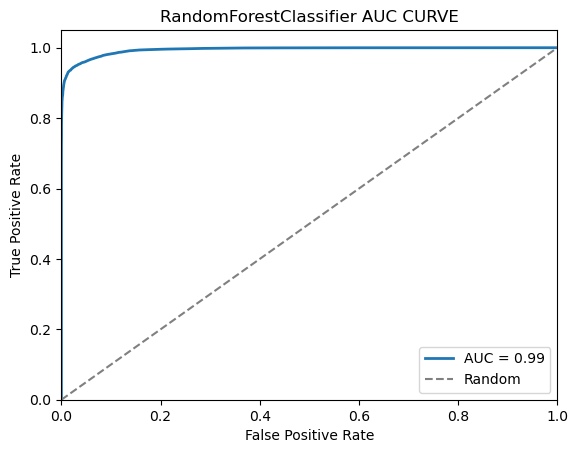

In [34]:
# Generate predicted probabilities
y_prob = rfr.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier AUC CURVE')
plt.legend(loc="lower right")
plt.show()

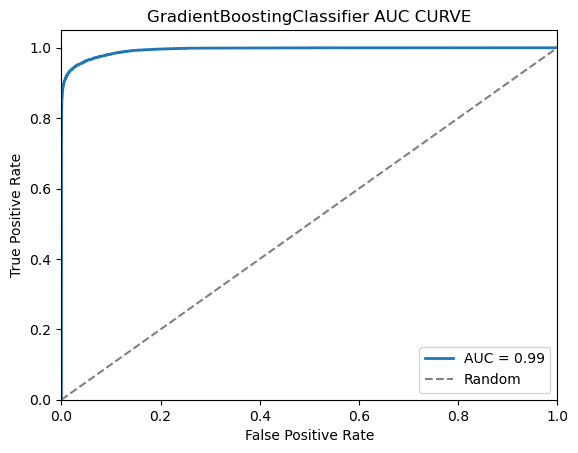

In [35]:
# Generate predicted probabilities
y_prob1 = gbc.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob1)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GradientBoostingClassifier AUC CURVE')
plt.legend(loc="lower right")
plt.show()

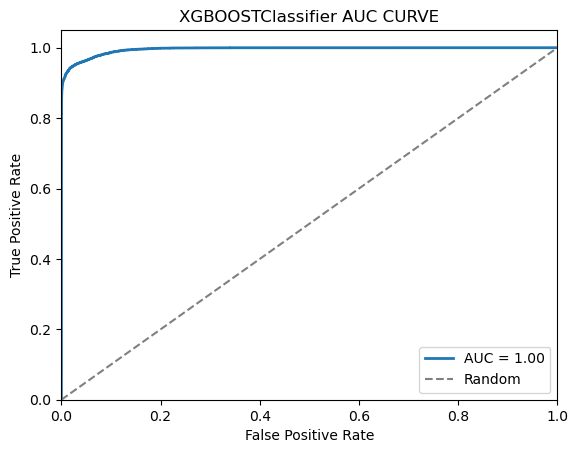

In [36]:
# Generate predicted probabilities
y_prob = xgb.predict_proba(X_test)[:,1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBOOSTClassifier AUC CURVE')
plt.legend(loc="lower right")
plt.show()

# as we see the xgboost classifier is the best models for satisfaction prediction

# comparing between actual and predicted by xgboost model

In [37]:
# Create a DataFrame with y_pred and y_test
df_comparing = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred2})

# Print the first 10 rows of the DataFrame
print(df_comparing.head(20))

        y_test  y_pred
98173        1       1
24942        0       0
69235        0       0
90480        1       1
36184        0       0
25120        0       0
24437        0       0
47378        0       0
93648        0       0
88661        0       0
67629        0       0
52983        1       1
126543       0       0
87263        0       0
67131        0       0
23587        1       1
44508        0       0
46261        0       0
71827        1       1
20100        1       1


# visualizing the most important features that effects on passengers satisfaction

In [38]:
# Create a DataFrame of feature importances
df_importances = pd.DataFrame(list(X), xgb.feature_importances_)

# Set the column names
df_importances.columns = ['feature name']

# Add a column with the feature importances
df_importances['importances'] = df_importances.index

# Sort the DataFrame by importance, descending
df_importances = df_importances.sort_values(by='importances', ascending=False)

# Set the index to the range from 0 to the length of the DataFrame
df_importances.index = np.arange(0, len(df_importances))

# Print the DataFrame
print(df_importances)

                         feature name  importances
0                     Online boarding     0.427373
1                      Type of Travel     0.142724
2               Inflight wifi service     0.103498
3                       Customer Type     0.065234
4                               Class     0.037340
5              Inflight entertainment     0.036650
6                     Checkin service     0.032179
7                         Cleanliness     0.021241
8                    Baggage handling     0.018268
9                    Leg room service     0.017652
10                   On-board service     0.017107
11                      Gate location     0.016122
12                       Seat comfort     0.016059
13                   Inflight service     0.015702
14             Ease of Online booking     0.008247
15                                Age     0.006089
16  Departure/Arrival time convenient     0.005355
17           Arrival Delay in Minutes     0.003958
18                     Food and

In [39]:
import plotly.express as px

# Sort the feature importances in descending order
df_importances = df_importances.sort_values(by='importances', ascending=True)

# Create a bar plot of the feature importances
fig = px.bar(df_importances, x='importances', y='feature name', color='importances',
             hover_data=['feature name'], color_continuous_scale=px.colors.sequential.Plasma)

# Set the title and axis labels
fig.update_layout(title='Feature Importances', xaxis_title='Importances', yaxis_title='Feature Name')

# Show the plot
fig.show()

# the most feature that effects on passengers satisfaction is online boarding so to raising the passengers satisfaction the us airline should be concerned with improving the online boarding performance. 